# Preparation

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

# change working diretory
# import os
# os.chdir("/content/gdrive/MyDrive/Dissertation/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!ls runs/detect
# %cd drive/MyDrive/Dissertation

ls: cannot access 'runs/detect': No such file or directory


Make sure GPU work fine.

In [9]:
!nvidia-smi

Thu Aug 10 11:14:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Make sure we are in the right working directory.

In [10]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8.

In [11]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.4/166.8 GB disk)


In [12]:
from ultralytics import YOLO

from IPython.display import display, Image

# Inference with the Best Model from Experiment #1

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-mini")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-mini-3 in yolov8:: 100%|██████████| 112/112 [00:00<00:00, 3163.68it/s]


### Evaluate the model on test set
Produce the performance of the model on the test set.

All other metrics are much higher than the training and validating reaults

In [14]:
%cd {HOME}

# !yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data_test.yaml

!yolo task=detect mode=val model={HOME}/gdrive/MyDrive/Dissertation/Models/augmented_best.pt data={dataset.location}/data_test.yaml

/content
2023-08-10 11:19:17.638299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 11:19:18.512979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 14.4MB/s]
val: Scanning /content/datasets/MinneApple-mini-3/test/labels... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<00:00, 516.17it/s]
val: New cache created: /content/datasets/MinneApple-mini-3/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.16s/it]
       

### Produce detection results

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True

# !yolo task=detect mode=predict model={HOME}/gdrive/My\ Drive/Dissertation/Models/best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True

**NOTE:** Let's take a look at few results.

In [ ]:
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
#       display(Image(filename=image_path, width=300))
#       print("\n")

# Training on the small dataset

Download the dataset.

In [31]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

## Original -Train:Val:Test = 30:10:10
# from roboflow import Roboflow
# rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
# project = rf.workspace("dissertation-bqltf").project("minneapple-mini")
# dataset = project.version(3).download("yolov8")

# Augmented -Train:Val:Test = 90:10:10
from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-mini")
dataset = project.version(5).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-mini-5 in yolov8:: 100%|██████████| 232/232 [00:00<00:00, 3143.31it/s]


## Train the model

In [44]:
%cd {HOME}
# !yolo task=detect mode=train model={HOME}/gdrive/MyDrive/Dissertation/Models/augmented_best.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True patience=20
# !yolo task=detect mode=train model={HOME}/gdrive/MyDrive/Dissertation/Models/best_mini.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True patience=20


!yolo task=detect mode=train model={HOME}/runs/detect/train6/weights/last.pt data={dataset.location}/data.yaml epochs=600 imgsz=720 plots=True patience=200  #


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-mini-5/data.yaml, epochs=600, patience=200, batch=16, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

In [45]:
%cp {HOME}/runs/detect/train7/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train7/weights/last.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train7/results.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train2/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train2/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


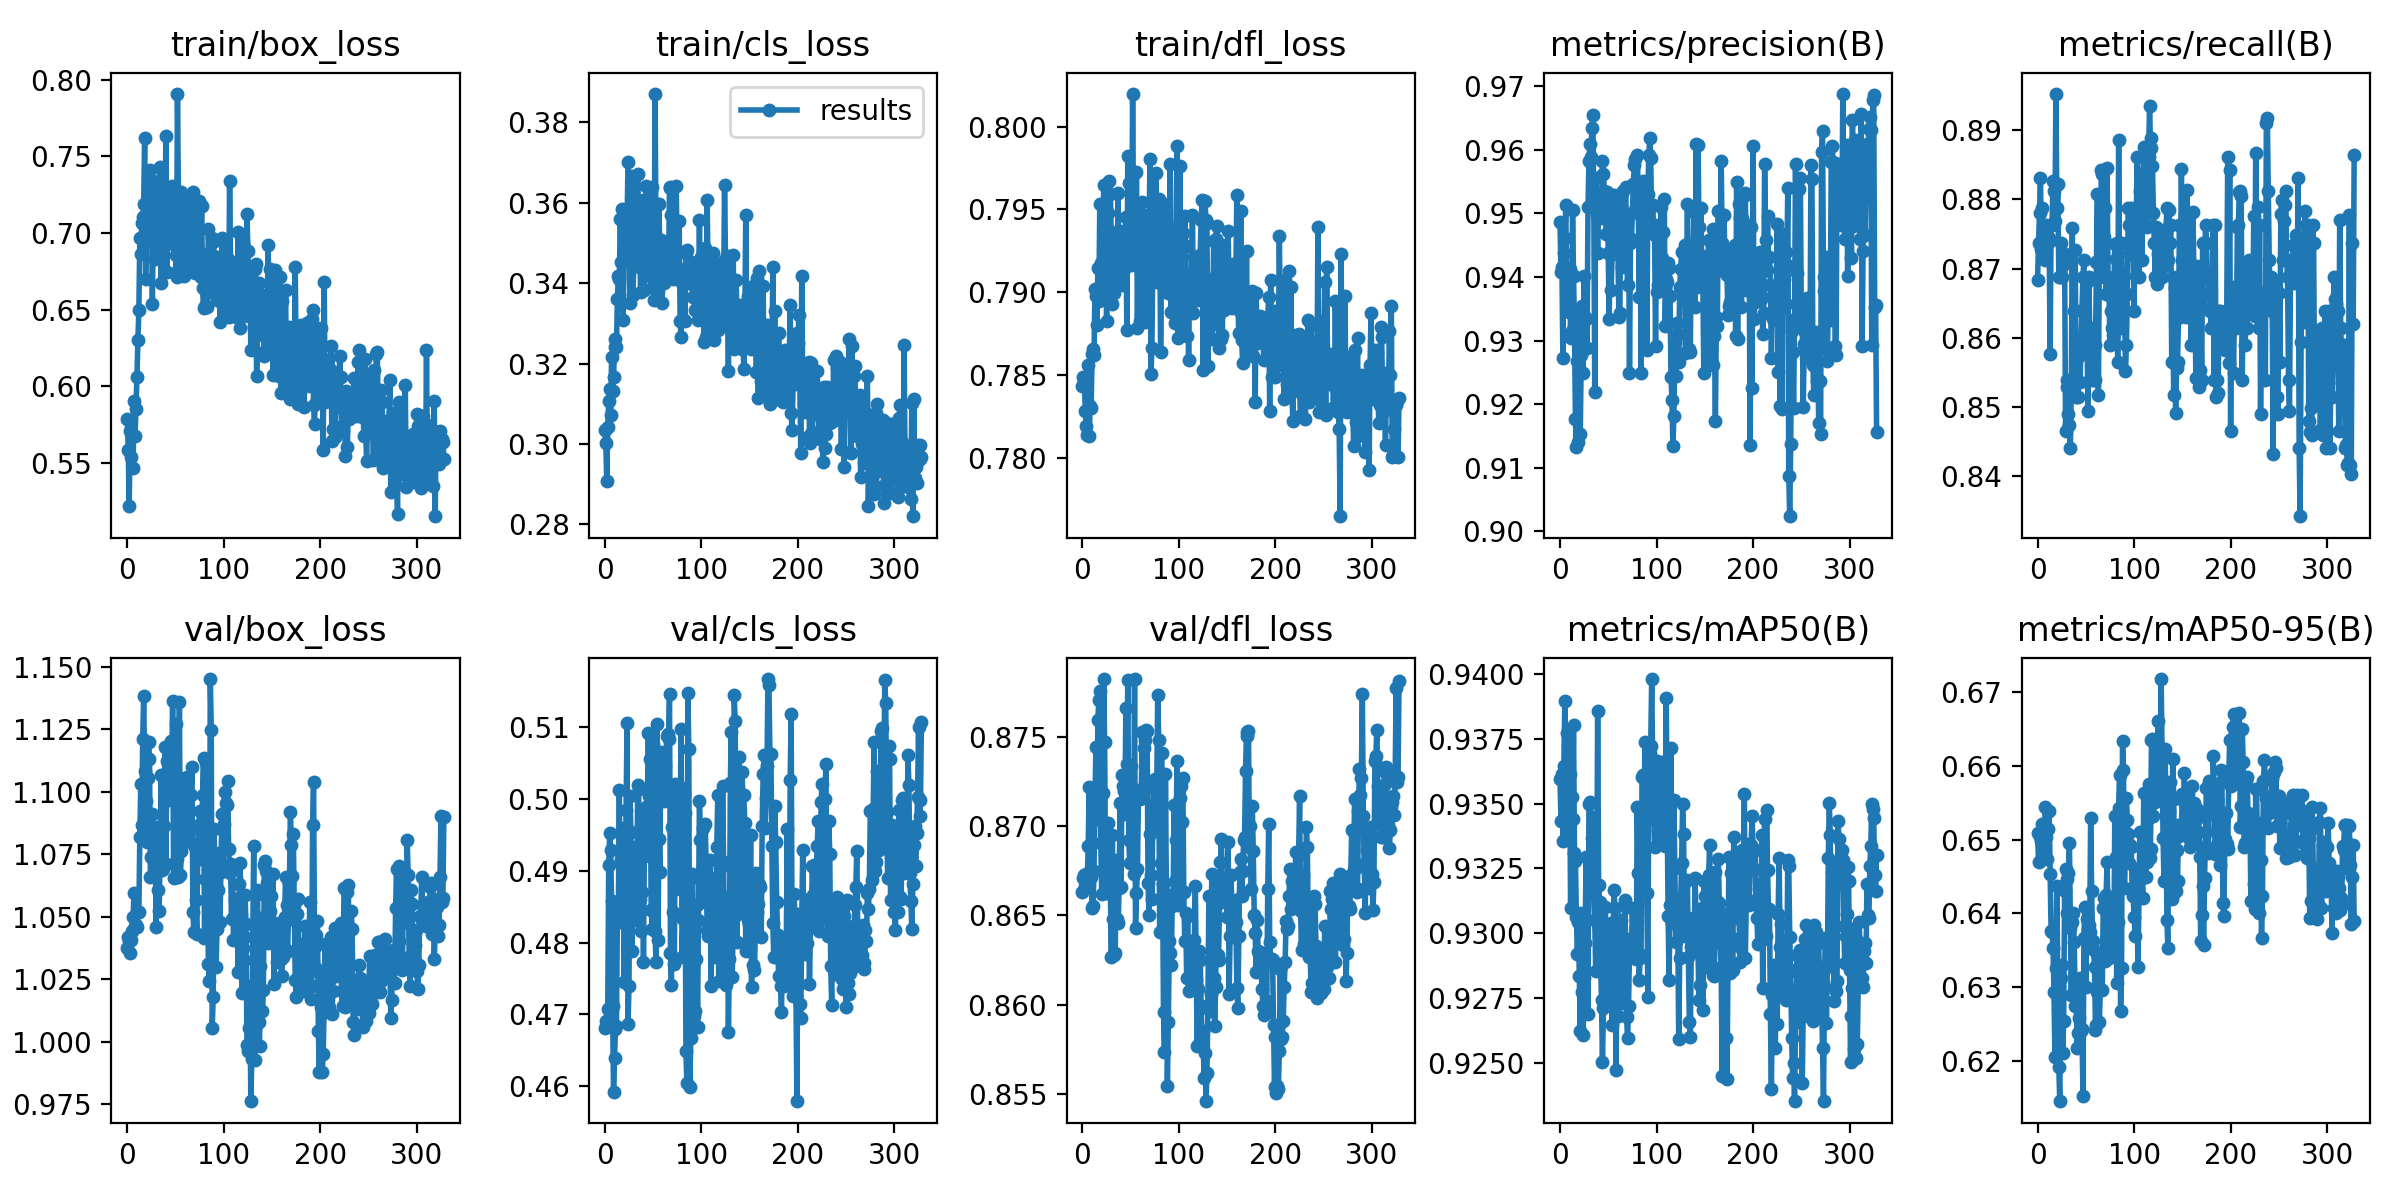

In [46]:
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=700)

## Inference with the Model

### Evaluate the model on test set


Produce the performance of the model on the test set.

Compared to the training results, for the results of all classes, the precosion is 5% higher, but the recall is 2.9% lower. The mAP50 is higher than the training results,

In [47]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data_test.yaml
# !yolo task=detect mode=val model={HOME}/gdrive/My\ Drive/Dissertation/Models/mini_best.pt data={dataset.location}/data_test.yaml

/content
2023-08-10 16:03:45.987431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 16:03:46.898583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-mini-5/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.19it/s]
                   all         10        468      0.941      0.893      0.952      0.632
Speed: 0.2ms pre-process, 10.5ms infer

### Produce detection results

In [ ]:
# %cd {HOME}
# !yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True imgsz=736 hide_labels=True

# # !yolo task=detect mode=predict model={HOME}/gdrive/My\ Drive/Dissertation/Models/mini_best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True

/content
2023-08-05 16:58:00.336279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 16:58:01.251006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/datasets/MinneApple-mini-4/test/images/20150919_174151_image161_png-_jpg.rf.0f7e1631b47dce891a954cb3179b2cd8.jpg: 736x416 115 apples, 63.4ms
image 2/10 /content/datasets/MinneApple-mini-4/test/images/20150921_131234_image476_png-_jpg.rf.469121cfe6b4f69cdffd7688d25551c4.jpg: 736x416 59 apples, 13.7ms
image 3/10 /content/datasets/MinneApple-mini-4/test/images/2015092

**NOTE:** Let's take a look at few results.

In [ ]:
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict5/*.jpg')[:]:
#       display(Image(filename=image_path, width=600))
#       print("\n")

Output hidden; open in https://colab.research.google.com to view.